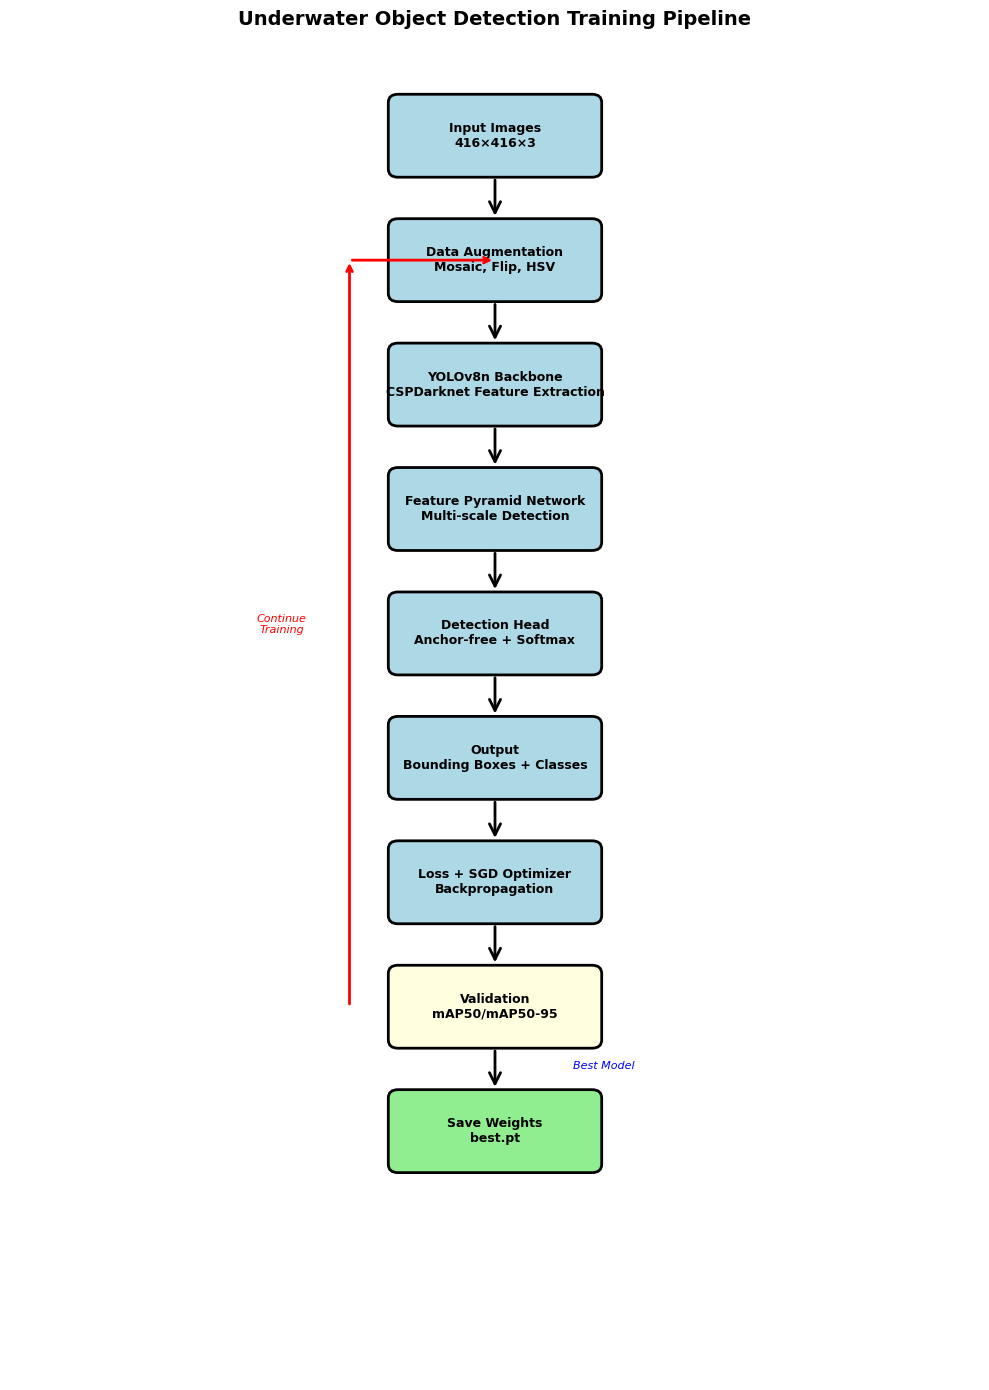

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(10, 14))
ax.set_xlim(0, 10)
ax.set_ylim(0, 16)
ax.axis('off')

# Define positions
positions = {
    'A': (5, 15),
    'B': (5, 13.5),
    'C': (5, 12),
    'D': (5, 10.5),
    'E': (5, 9),
    'F': (5, 7.5),
    'G': (5, 6),
    'H': (5, 4.5),
    'I': (5, 3),
}

# Node labels
labels = {
    'A': 'Input Images\n416×416×3',
    'B': 'Data Augmentation\nMosaic, Flip, HSV',
    'C': 'YOLOv8n Backbone\nCSPDarknet Feature Extraction',
    'D': 'Feature Pyramid Network\nMulti-scale Detection',
    'E': 'Detection Head\nAnchor-free + Softmax',
    'F': 'Output\nBounding Boxes + Classes',
    'G': 'Loss + SGD Optimizer\nBackpropagation',
    'H': 'Validation\nmAP50/mAP50-95',
    'I': 'Save Weights\nbest.pt',
}

# Draw nodes
for node, (x, y) in positions.items():
    if node == 'H':  # Diamond shape for validation
        color = '#FFFFE0'
        box = mpatches.FancyBboxPatch((x-1, y-0.4), 2, 0.8,
                                       boxstyle="round,pad=0.1",
                                       facecolor=color,
                                       edgecolor='black', linewidth=2)
    elif node == 'I':  # Green for final output
        color = '#90EE90'
        box = FancyBboxPatch((x-1, y-0.4), 2, 0.8,
                            boxstyle="round,pad=0.1",
                            facecolor=color,
                            edgecolor='black', linewidth=2)
    else:  # Light blue for process steps
        color = '#ADD8E6'
        box = FancyBboxPatch((x-1, y-0.4), 2, 0.8,
                            boxstyle="round,pad=0.1",
                            facecolor=color,
                            edgecolor='black', linewidth=2)

    ax.add_patch(box)
    ax.text(x, y, labels[node], ha='center', va='center',
            fontsize=9, fontweight='bold')

# Draw arrows
arrows = [
    ('A', 'B', ''),
    ('B', 'C', ''),
    ('C', 'D', ''),
    ('D', 'E', ''),
    ('E', 'F', ''),
    ('F', 'G', ''),
    ('G', 'H', ''),
    ('H', 'I', 'Best Model'),
]

for start, end, label in arrows:
    x1, y1 = positions[start]
    x2, y2 = positions[end]
    arrow = FancyArrowPatch((x1, y1-0.5), (x2, y2+0.5),
                           arrowstyle='->', mutation_scale=20,
                           linewidth=2, color='black')
    ax.add_patch(arrow)

    if label:
        ax.text((x1+x2)/2 + 0.8, (y1+y2)/2, label,
               fontsize=8, style='italic', color='blue')

# Draw feedback loop (Continue Training)
ax.annotate('', xy=(3.5, 13.5), xytext=(3.5, 4.5),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax.annotate('', xy=(5, 13.5), xytext=(3.5, 13.5),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax.text(2.8, 9, 'Continue\nTraining', fontsize=8,
        style='italic', color='red', ha='center')

plt.title('Underwater Object Detection Training Pipeline',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
